### Descargar imágenes

In [ ]:
import os
if os.path.exists('Einstein.jpg'):   
    print ('La imagen ya existe')
else:
    os.system('wget -nc https://ep01.epimg.net/verne/imagenes/2015/04/04/articulo/1428136596_312762_1428138368_sumario_normal.jpg')
    os.system('mv 1428136596_312762_1428138368_sumario_normal.jpg Einstein.jpg')
    print('Imagen descargada')

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

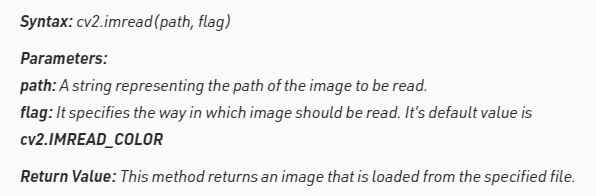

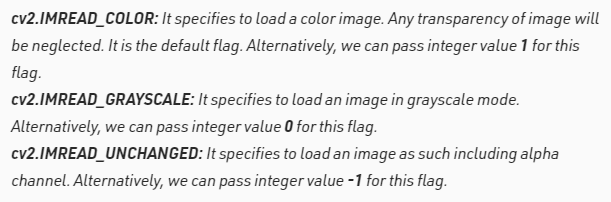

(-0.5, 559.5, 672.5, -0.5)

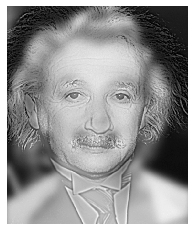

In [12]:
#Lectura de la imagen
#img = cv2.imread('Einstein.jpg',0)
img = cv2.imread("C:/Users/SANTIAGO/PDI Procesamiento Digital de Imagenes/Unidad 3 - OpenCV/Datasets/1/Einstein.jpg",0)

plt.imshow(img, cmap='gray')
plt.axis('off')

### Transformada de Fourier
La transformada de Fourier es una extensión de las series de Fourier a señales no periódicas, en donde se supone que su periodo abarca desde el menos infinito al infinito. 
Para efectos prácticos, la transformada de Fourier en imágenes se emplea para pasar del dominio del espacio al dominio de las frecuencias o viceversa mediante la transformada inversa. Matemáticamente estas transformaciones se expresan de la siguiente manera:

Transformada de Fourier
$$F(u,v)=\frac{1}{N}\sum_{x=0}^{N-1}\sum_{y=0}^{N-1}f(x,y)e^{\frac{-2\pi i(ux+vy)}{N}}$$
Transformada inversa de Fourier
$$f(x,y)=\frac{1}{N}\sum_{u=0}^{N-1}\sum_{v=0}^{N-1}F(u,v)e^{\frac{2\pi i(ux+vy)}{N}}$$

Primero veremos cómo encontrar Transformada de Fourier usando Numpy. Numpy tiene un paquete FFT para hacer esto. La función np. fft. fft2() nos proporciona la transformación de frecuencia, la cual será una matriz compleja. Su primer argumento es la imagen de entrada, que deberá estar en escala de grises. El segundo argumento es opcional y decide el tamaño de la matriz de salida. Si es mayor que el tamaño de la imagen de entrada, la imagen de entrada se rellena con ceros antes del cálculo de FFT. Si es inferior a la imagen de entrada, se recortará la imagen de entrada. Si no se pasa ningún argumento, el tamaño de la matriz de salida será igual al de la entrada.

Una vez obtenido el resultado, la componente de frecuencia cero (componente DC) estará en la esquina superior izquierda. Si quieres ponerlo en el centro, necesitas desplazar el resultado en N/2 en ambas direcciones. Esto se hace simplemente con la función np. fft. fftshift().

(-0.5, 559.5, 672.5, -0.5)

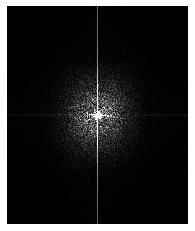

In [37]:
#transformada de Fourier
f = np.fft.fft2(img)
#Centrar las frecuencias en el centro de la imagen
fshift = np.fft.fftshift(f)
#Mostrar la imagen
plt.imshow(np.abs(fshift), cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.axis('off')

In [25]:
crow-ven,crow+ven, ccol-ven,ccol+ven

(318, 354, 262, 298)

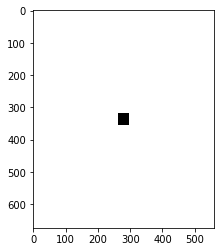

In [29]:
#Crear filtro
rows, cols = img.shape
fil=np.ones((rows,cols)) # Matriz Inicial llena de unos
ven=18                   # Seleccion de tamaño del espectro de interés / Radio de las Frecuencias de interes
crow,ccol = int(rows/2) , int(cols/2)
fil[crow-ven:crow+ven, ccol-ven:ccol+ven] = 0
plt.imshow(fil, cmap = 'gray') # 0 = Negro / 255 = Blanco

In [38]:
#filtro pasa altas (Con ceros en el centro)
fshift1=fshift*fil
#filtro pasa bajas (Con ceros hacia los bordes)
fshift2=fshift*(1-fil) 

In [18]:
#Deshacer el centrado de las frecuencias
f_ishift1 = np.fft.ifftshift(fshift1)
#Transformada rápida de fourier inversa
img_back1 = np.fft.ifft2(f_ishift1)
img_back1 = np.abs(img_back1)

#Deshacer el centrado de las frecuencias
f_ishift2 = np.fft.ifftshift(fshift2)
#Transformada rápida de fourier inversa
img_back2 = np.fft.ifft2(f_ishift2)
img_back2 = np.abs(img_back2)

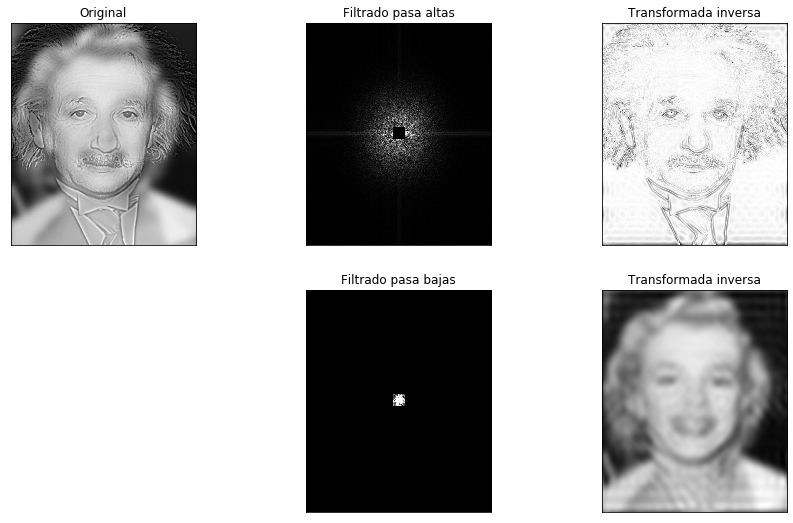

In [19]:
plt.figure(figsize=(15,9))
plt.subplot(231),plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(np.abs(fshift1), cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.title('Filtrado pasa altas'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(1-img_back1,cmap = 'gray')
plt.title('Transformada inversa'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(np.abs(fshift2),cmap = 'gray', vmin=np.min(np.abs(fshift)), vmax=np.max(np.abs(fshift))/500)
plt.title('Filtrado pasa bajas'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(img_back2,cmap = 'gray')
plt.title('Transformada inversa'), plt.xticks([]), plt.yticks([])
plt.show()